In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
app_data=pd.read_csv(r'C:\Users\gauta\OneDrive\Documents\UpGrad\Case Study - Credit EDA\application_data.csv')

In [3]:
#to view all the columns outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#examining the shape of the dataset
shape=app_data.shape
shape

(307511, 122)

In [5]:
#viewing the percentage of null values in all the columns
(100*app_data.isnull().sum())/len(app_data.index)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### There are lot of columns with more number of null values, removing them based on a percentage value.

In [6]:
#creating empty_col which has columns data which are having more than 47% null values
empty_col=app_data.isnull().sum()
empty_col=empty_col[empty_col.values>=0.47*len(app_data.index)]

In [7]:
#length of the empty columns
len(empty_col)

49

In [8]:
#Removing the columns with more than 47% of null values
empty_list=list(empty_col.index)
app_data.drop(labels=empty_list,axis=1,inplace=True)
app_data.shape


(307511, 73)

#### Removed 49 columns which are having more than  47% of null values

In [9]:
#Identifying the remaining columns in dataset
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE

#### Identifying the unwanted columns 

In [10]:
#listing out unwanted columns list from the new dataset
unwantd_col=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_EMAIL','FLAG_PHONE','FLAG_CONT_MOBILE','FLAG_WORK_PHONE','FLAG_EMP_PHONE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','DAYS_LAST_PHONE_CHANGE']

In [11]:
#Dropping the unwanted columns from the dataset
app_data.drop(labels=unwantd_col,axis=1,inplace=True)

In [12]:
#Checking the null values percentage in the remaining columns
(app_data.isnull().sum()/len(app_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
WEEKDAY_APPR_PROCESS_START     0.000000


In [13]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non

In [14]:
#Converting the Family members and Days registration columns into int from float
app_data['CNT_FAM_MEMBERS']=pd.to_numeric(app_data['CNT_FAM_MEMBERS'],errors='coerce')
app_data['DAYS_REGISTRATION']=pd.to_numeric(app_data['DAYS_REGISTRATION'],errors='coerce')

In [15]:
#Changing the YEARS columns from negative to positive
app_data['DAYS_BIRTH']=app_data['DAYS_BIRTH'].apply(lambda x: x if x>0 else x*-1)
app_data['DAYS_EMPLOYED']=app_data['DAYS_EMPLOYED'].apply(lambda x: x if x>0 else x*-1)
app_data['DAYS_ID_PUBLISH']=app_data['DAYS_ID_PUBLISH'].apply(lambda x: x if x>0 else x*-1)
app_data['DAYS_REGISTRATION']=app_data['DAYS_REGISTRATION'].apply(lambda x: x if x>0 else x*-1)                                            

In [16]:
# # Checking the condition Days_Birth > Days_Employed
app_data[app_data.DAYS_BIRTH<app_data.DAYS_EMPLOYED]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,1,NaN,2.0,WEDNESDAY,14,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,20417,365243,5246.0,2512,1,NaN,2.0,FRIDAY,7,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827,365243,9012.0,3684,1,NaN,2.0,FRIDAY,12,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,23920,365243,9817.0,4969,1,NaN,2.0,FRIDAY,11,XNA,0.650765,0.751724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,23548,365243,5745.0,4576,1,NaN,1.0,WEDNESDAY,9,XNA,0.766138,0.684828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,22414,365243,11976.0,4171,1,NaN,1.0,MONDAY,15,XNA,0.195625,0.360613,11.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,24911,365243,11211.0,4213,1,NaN,1.0,MONDAY,12,XNA,0.589906,0.520898,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,23125,365243,5485.0,4115,1,NaN,2.0,WEDNESDAY,10,XNA,0.307082,0.255332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,24384,365243,7369.0,2357,1,NaN,1.0,MONDAY,15,XNA,0.346391,0.742182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


#### There are 55,374 columns which have DAYS_EMPLOYED greater than DAYS_AGE which is actually impossible, so we need to drop these columns.

In [17]:
#Checking Days_Birth<Days_Registration
app_data=app_data[app_data['DAYS_BIRTH']>app_data['DAYS_REGISTRATION']]

In [18]:
#Checking Days_Birth<Days_IDPublish
app_data=app_data[app_data['DAYS_BIRTH']>app_data['DAYS_ID_PUBLISH']]

### Checking for the columns which have null values less than 13%

In [19]:
app_data['AMT_ANNUITY'].isnull().sum()
app_data['AMT_ANNUITY'].describe()

count    306593.000000
mean      27120.729405
std       14495.913898
min        1615.500000
25%       16546.500000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

#### Since there are very less null values i,e 12, and there is considerable amount of difference between mean and median, we can delete these rows without inputing.

In [20]:
app_data['AMT_GOODS_PRICE'].isnull().sum()

276

In [21]:
app_data['AMT_GOODS_PRICE'].describe()

count    3.063290e+05
mean     5.387987e+05
std      3.695702e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

#### Since the percentage of null values is so small 0.09% we can remove these rows from the dataset as it does not impact our results 

In [22]:
app_data['NAME_TYPE_SUITE'].isnull().sum()

1284

In [23]:
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      247783
Family              40054
Spouse, partner     11329
Children             3262
Other_B              1764
Other_A               858
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### The number of missing values here is 0.42% and we found out that Unaccompanied is category which has highest number ~=80% we can fill the missing values with the Unaccompanied value.

In [24]:
app_data['EXT_SOURCE_2'].isnull().sum()

656

In [25]:
app_data['EXT_SOURCE_2'].describe()

count    3.059490e+05
mean     5.146015e-01
std      1.909760e-01
min      8.173617e-08
25%      3.927964e-01
50%      5.661172e-01
75%      6.637538e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

#### We can see that the median and mean of the EXTERNAL_SOURCE2 are very close and the missing values percentage is 0.2%, we can impute these values with median 

In [26]:
app_data['CODE_GENDER'].isnull().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: CODE_GENDER, Length: 306605, dtype: bool>

In [27]:
app_data['CODE_GENDER'].value_counts()

F      201908
M      104693
XNA         4
Name: CODE_GENDER, dtype: int64

#### Since we have only 2 values missing and we have Female gender as the mode and highest count we can replace these two columns with Female

In [28]:
#Dividing the Defaulters and Non-Defaulters
Defaulter=app_data[app_data.TARGET==1]
Non_Defaulters=app_data[app_data.TARGET==0]

### Checking for Outliers

In [29]:
#Function for plotting outliers
def outliers_plot(column):
    plt.figure(figsize=[14,5])
    sns.set_style('whitegrid')
    plt.subplot(1,2,1)
    plt.title('Boxplot for  Defaulters {}'.format(column),fontdict={'fontsize':15,'fontweight':5})
    sns.boxplot(y=Defaulter[column],color='red')
    if column=='AMT_INCOME_TOTAL' or column=='DAYS_EMPLOYED':
        plt.yscale('log')
    sns.set_style('whitegrid')
    plt.subplot(1,2,2)
    plt.title('Boxplot for Non defaulters {}'.format(column),fontdict={'fontsize':15,'fontweight':5})
    sns.boxplot(y=Non_Defaulters[column],color='royalblue')
    if column=='AMT_INCOME_TOTAL' or column=='DAYS_EMPLOYED':
        plt.yscale('log')
plt.show()

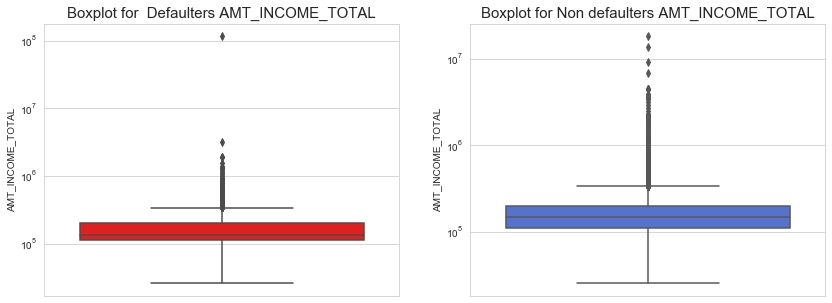

In [30]:
outliers_plot('AMT_INCOME_TOTAL')

#### 1. We can observe outliers in both defaulters and non-defaulters, non-defaulters have more outliers comparitively, and it is normal as we can have people with bigger salaries
#### 2. We can observe the First quartile is larger in both the types means most of the people have income in the first quartile

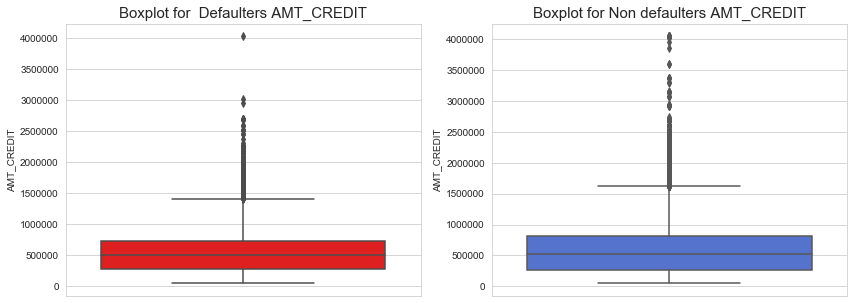

In [31]:
outliers_plot('AMT_CREDIT')

#### 1. We can see outliers in both the cases 
#### 2. The Third quartile is larger than others, maximum number of people are in third quartile

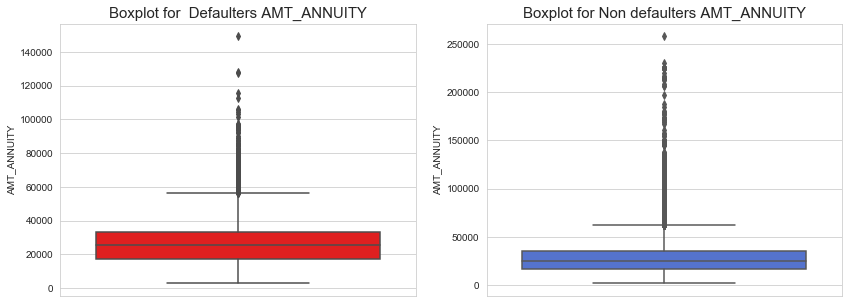

In [32]:
outliers_plot('AMT_ANNUITY')

#### 1. We can see outliers in both the cases
#### 2. The Third quartile is larger than others, maximum number of people are in third quartile 

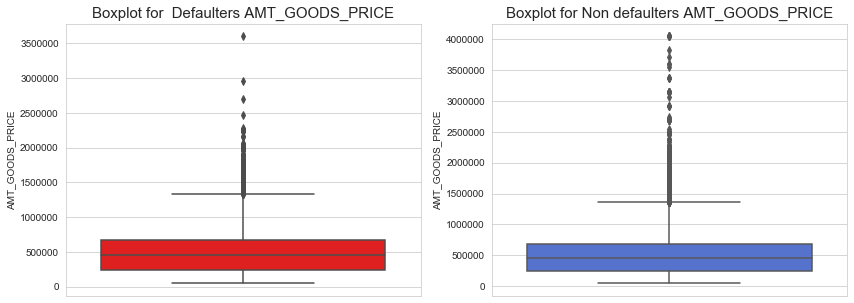

In [33]:
outliers_plot('AMT_GOODS_PRICE')

#### 1. We can see outliers in both the cases
#### 2. The Third quartile is larger than others, maximum number of people are in third quartile 

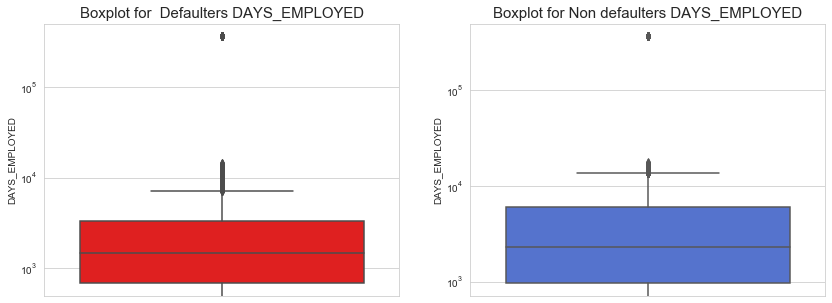

In [34]:
outliers_plot('DAYS_EMPLOYED')

#### We can observe very few outliers in this case. 

### Checking for imbalance

In [35]:
data_imbalance=len(Non_Defaulters)/len(Defaulter)
data_imbalance

11.399102232287285

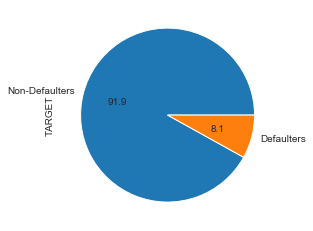

In [36]:
#Showing the percentages in graph
app_data['TARGET'].value_counts().plot(kind='pie',autopct='%1.1f',labels=['Non-Defaulters','Defaulters'])
plt.show()

#### Thr imbalance ratio is 11.4 and the percentage is 91.9 and 8.1 

### Univariate Analysis on Categorical variables

In [37]:
#Function to plot charts for showing univariate analysis
def uni_variateplot(var,subplot):
    if len(Defaulter[var].value_counts())<5:
        plt.figure(figsize=[14,5])
        plt.subplot(1,2,1)
        sns.countplot(x=Defaulter[var],data=Defaulter,order=Defaulter[var].value_counts().index)
        plt.xlabel('{}'.format(var))
        plt.ylabel('Total Count of Loans')
        plt.title('Plot of {} for Defaulters'.format(var))
    else:
        if subplot==True:
            plt.figure(figsize=[14,5])
            plt.subplot(1,2,1)
        else:
            plt.figure(figsize=[15,10])
        sns.countplot(x=Defaulter[var],data=Defaulter,order=Defaulter[var].value_counts().index)
        plt.xlabel('{}'.format(var))
        plt.ylabel('Total Count of Loans')
        plt.xticks(rotation=90)
        plt.title('Plot of {} for Defaulters'.format(var))

    if len(Non_Defaulters[var].value_counts())<5:        
        plt.subplot(1,2,2)
        sns.countplot(x=Non_Defaulters[var],data=Non_Defaulters,order=Non_Defaulters[var].value_counts().index)
        plt.xlabel('{}'.format(var))
        plt.ylabel('Total Count of Loans')
        plt.title('Plot of {} for Non Defaulters'.format(var))
    else:
        if subplot==True:
            plt.subplot(1,2,2)
        else:
            plt.figure(figsize=[15,10])
        sns.countplot(x=Non_Defaulters[var],data=Non_Defaulters,order=Non_Defaulters[var].value_counts().index)
        plt.xlabel('{}'.format(var))
        plt.ylabel('Total Count of Loans')
        plt.xticks(rotation=90)
        plt.title('Plot of {} for Non Defaulters'.format(var))

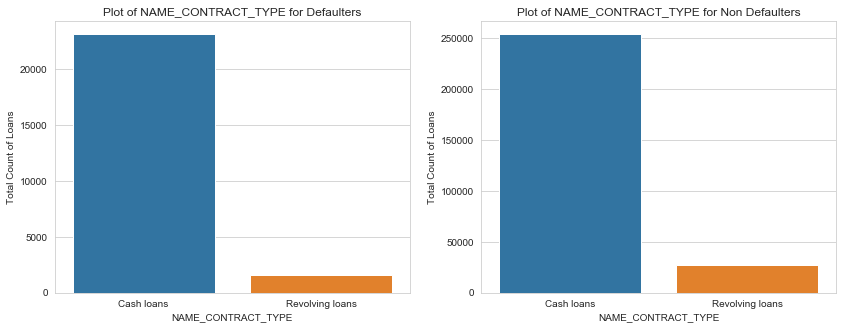

In [38]:
uni_variateplot('NAME_CONTRACT_TYPE',subplot=True)

#### Cash loans are more for both Defaulters and Non-Defaulters

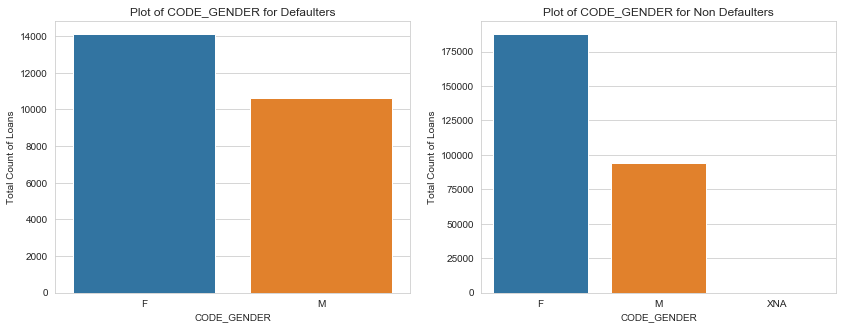

In [39]:
uni_variateplot('CODE_GENDER',subplot=True)

#### The female count is more in both defaulters and non-defaulters 

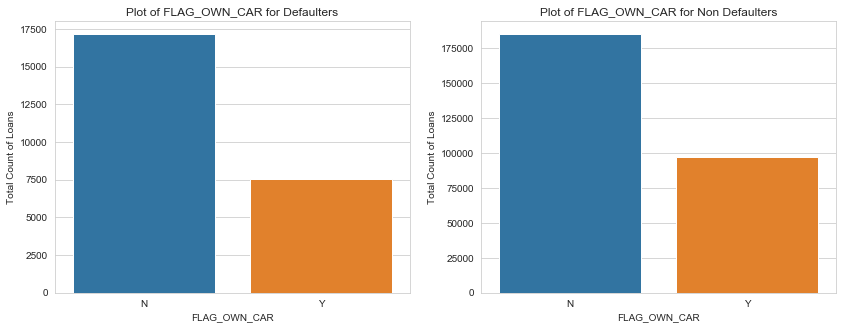

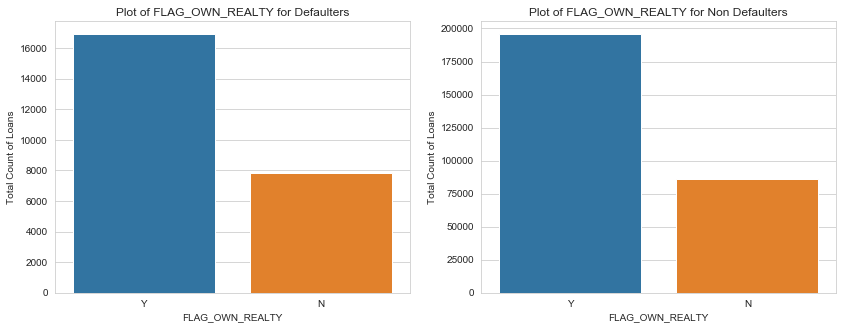

In [40]:
uni_variateplot('FLAG_OWN_CAR',subplot=True)
uni_variateplot('FLAG_OWN_REALTY',subplot=True)

#### 1. People who doesn't have a car has more count in bothe the cases
#### 2. People who own a flat are higher in number in Defaulters and non-Defaulters

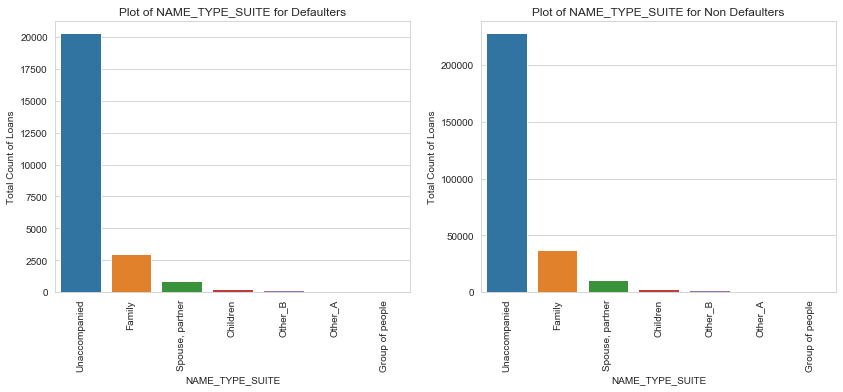

In [41]:
uni_variateplot('NAME_TYPE_SUITE',subplot=True)

#### People of category Unaccompanied are higher in count

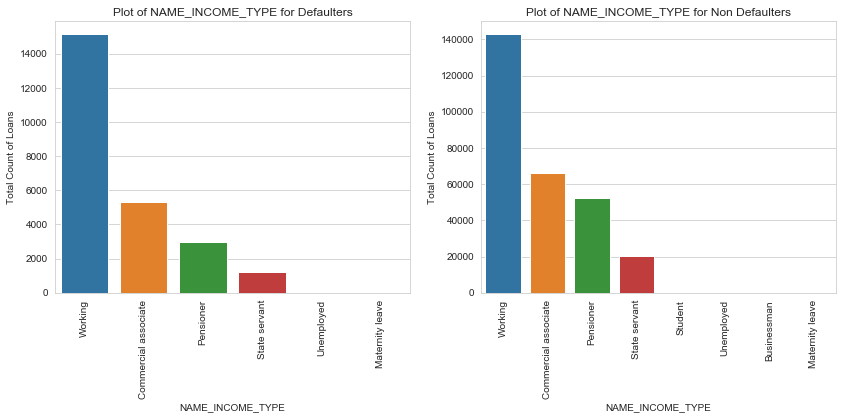

In [42]:
uni_variateplot('NAME_INCOME_TYPE',subplot=True)

#### People belonging to the Working type are higher 

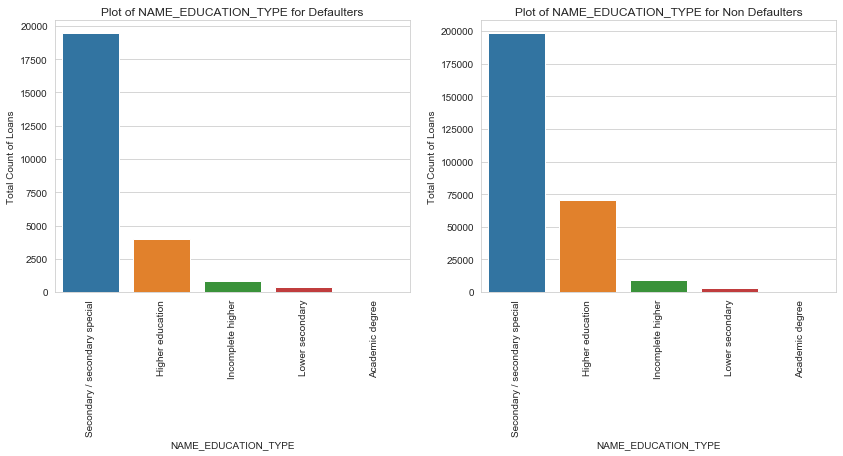

In [43]:
uni_variateplot('NAME_EDUCATION_TYPE',subplot=True)

#### People with Secondary/Secondaty special are more 

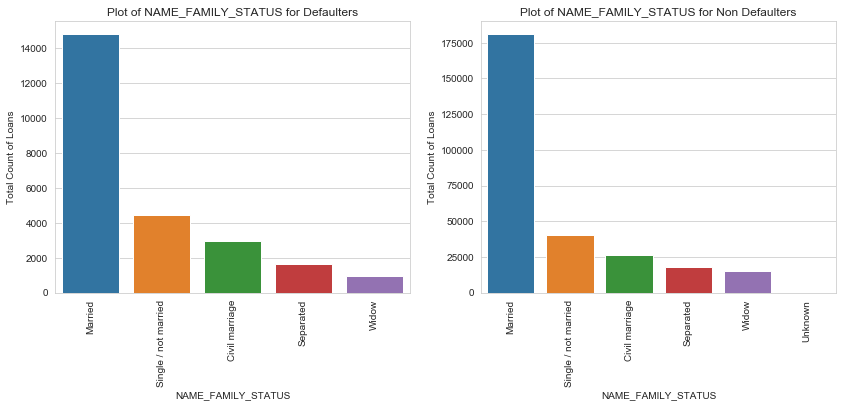

In [44]:
uni_variateplot('NAME_FAMILY_STATUS',subplot=True)

#### The Married sector has higher number of defaulters and non-defaulters

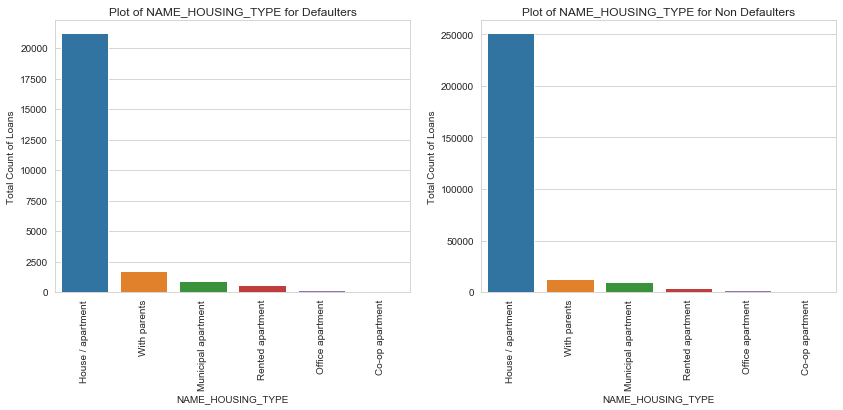

In [45]:
uni_variateplot('NAME_HOUSING_TYPE',subplot=True)

#### People with House/Apartment type are higher

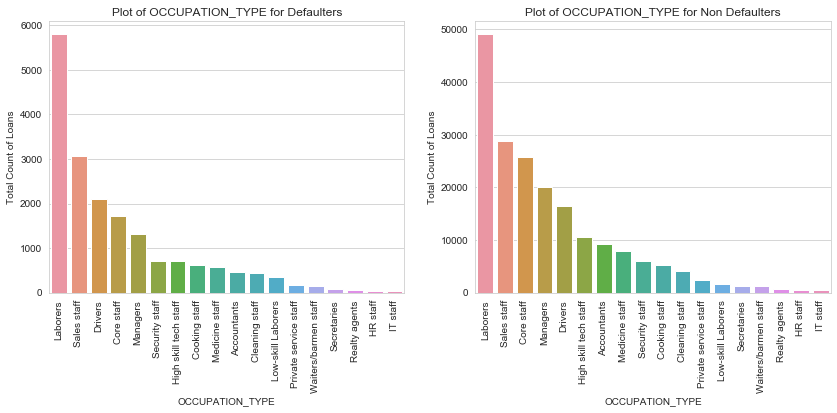

In [46]:
uni_variateplot('OCCUPATION_TYPE',subplot=True)

#### Labourers have the highest count as Defaulters and Non-Defaulters 

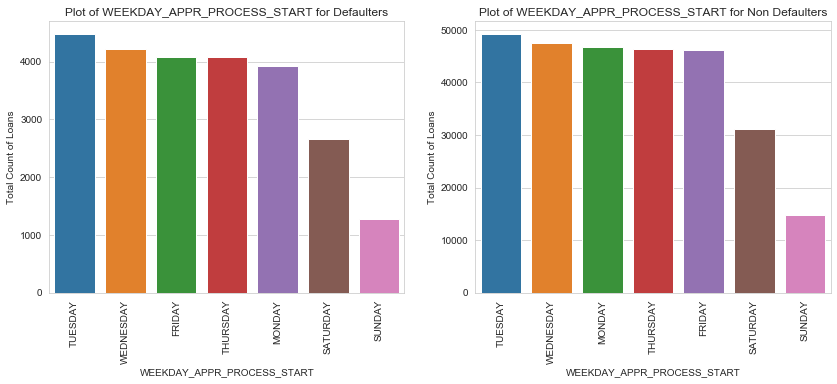

In [47]:
uni_variateplot('WEEKDAY_APPR_PROCESS_START',subplot=True)

#### Tuesday has highest number of count followed by wednesday 

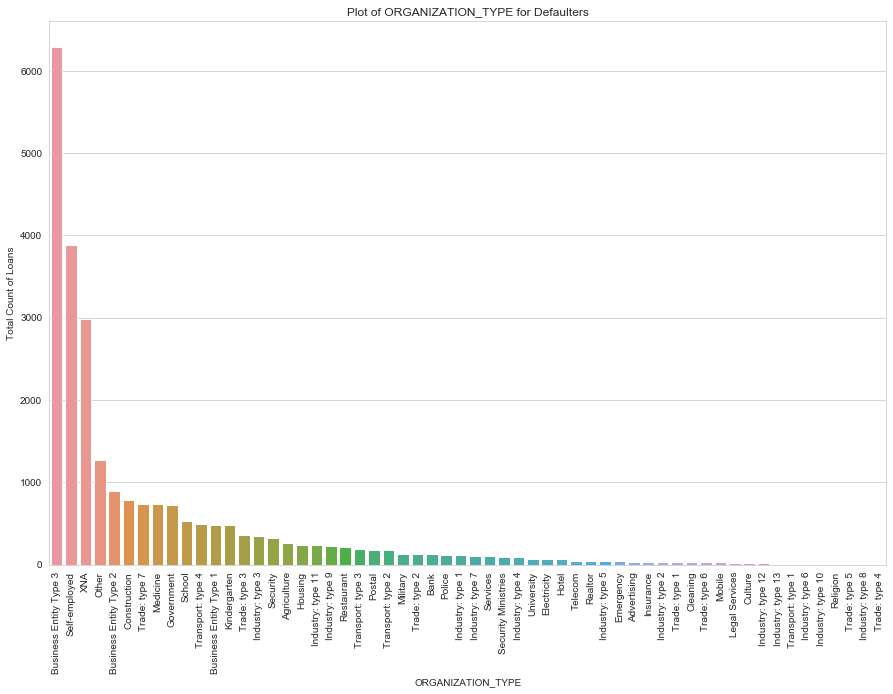

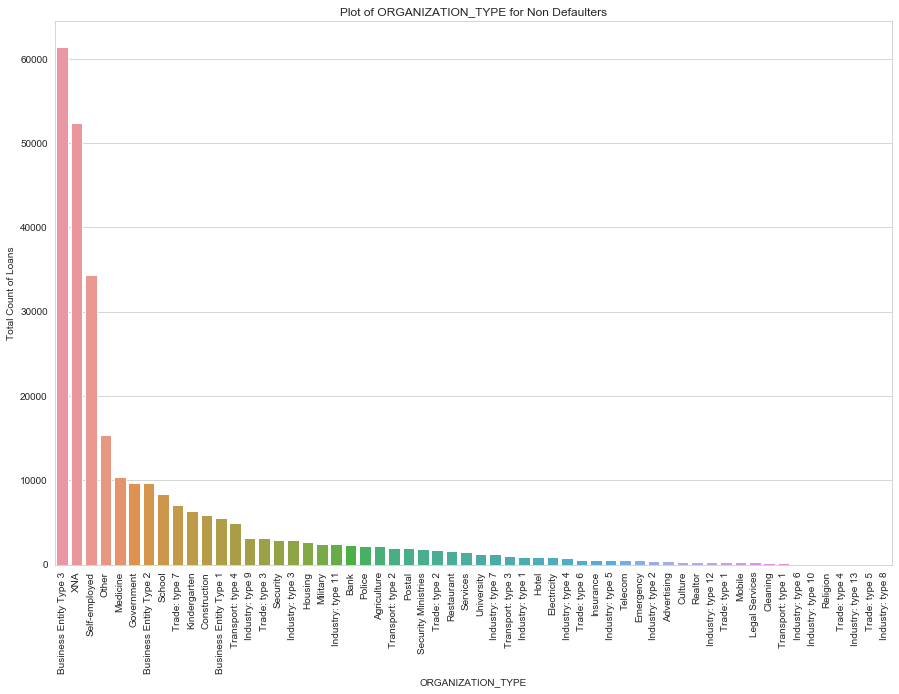

In [48]:
uni_variateplot('ORGANIZATION_TYPE',subplot=False)

#### Business entity type 3 has the most number of counts. 

In [49]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,306605.000000,306605.000000,306605.000000,3.066050e+05,3.066050e+05,306593.000000,3.063290e+05,306605.000000,306605.000000,306605.000000,306605.000000,306605.000000,306605.000000,306603.000000,306605.000000,3.059490e+05,245911.000000,305586.000000,305586.000000,305586.000000,305586.000000,265296.000000,265296.000000,265296.000000,265296.000000,265296.000000,265296.000000
mean,278162.364492,0.080651,0.417221,1.688762e+05,5.994740e+05,27120.729405,5.387987e+05,0.020879,16055.065873,67907.140738,4971.536439,2998.096649,0.999997,2.153293,12.061610,5.146015e-01,0.511083,1.422087,0.143406,1.405136,0.100011,0.006389,0.007011,0.034373,0.267716,0.265477,1.900458
std,102790.042246,0.272299,0.722448,2.374470e+05,4.026179e+05,14495.913898,3.695702e+05,0.013838,4356.021767,139590.838901,3515.722145,1508.813398,0.001806,0.910620,3.266053,1.909760e-01,0.194807,2.401324,0.446794,2.380145,0.362318,0.083781,0.110868,0.204692,0.916758,0.794529,1.869538
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189125.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16546.500000,2.385000e+05,0.010006,12442.000000,936.000000,2002.000000,1727.000000,1.000000,2.000000,10.000000,3.927964e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278161.000000,0.000000,0.000000,1.485000e+05,5.147775e+05,24916.500000,4.500000e+05,0.018850,15769.000000,2227.000000,4490.000000,3262.000000,1.000000,2.000000,12.000000,5.661172e-01,0.537070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367128.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19692.000000,5739.000000,7446.000000,4300.000000,1.000000,3.000000,14.000000,6.637538e-01,0.669057,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,1.000000,20.000000,23.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Univariate and Bivariate analysis

In [50]:
#Cutting the continoius variables into bins
Defaulter['Income_Bins']=pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Income_Bins']=pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
Defaulter['AMT_INCOME_TOTAL'].describe()

count    2.472800e+04
mean     1.656930e+05
std      7.481321e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

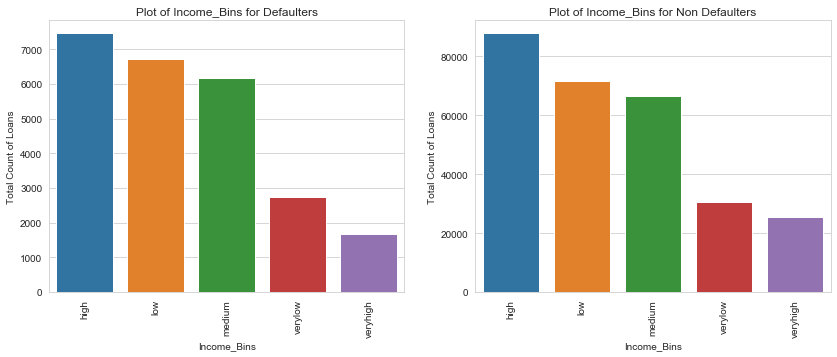

In [52]:
uni_variateplot('Income_Bins',subplot=True)

#### People under High income are more defaulters afollowed by Low income 

In [53]:
Defaulter['Annuity_bin']=pd.qcut(app_data.loc[:,'AMT_ANNUITY'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Annuity_bin']=pd.qcut(app_data.loc[:,'AMT_ANNUITY'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


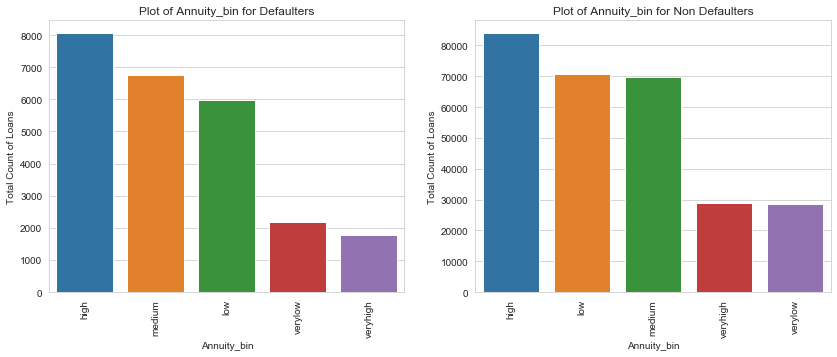

In [54]:
uni_variateplot('Annuity_bin',True)

#### Defaulters with Annuity amount under High bin are highest 

In [55]:
Defaulter['Credit_bin']=pd.qcut(app_data.loc[:,'AMT_CREDIT'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Credit_bin']=pd.qcut(app_data.loc[:,'AMT_CREDIT'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


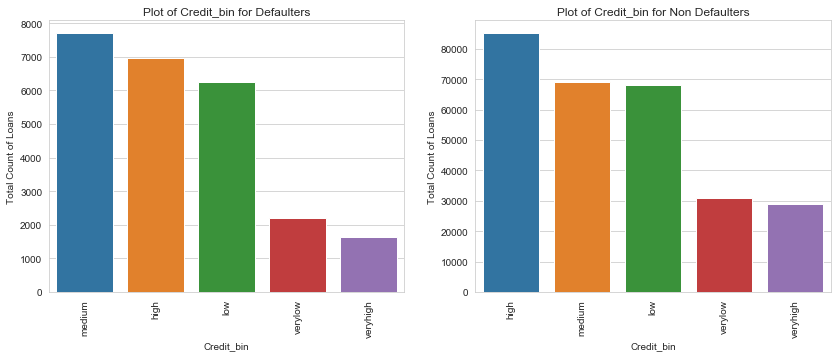

In [56]:
uni_variateplot('Credit_bin',True)

#### Defaulters  are mostly under Credit bin-Medium

In [57]:
Defaulter['Amt_Goods_Price_bin']=pd.qcut(app_data.loc[:,'AMT_GOODS_PRICE'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Amt_Goods_Price_bin']=pd.qcut(app_data.loc[:,'AMT_GOODS_PRICE'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


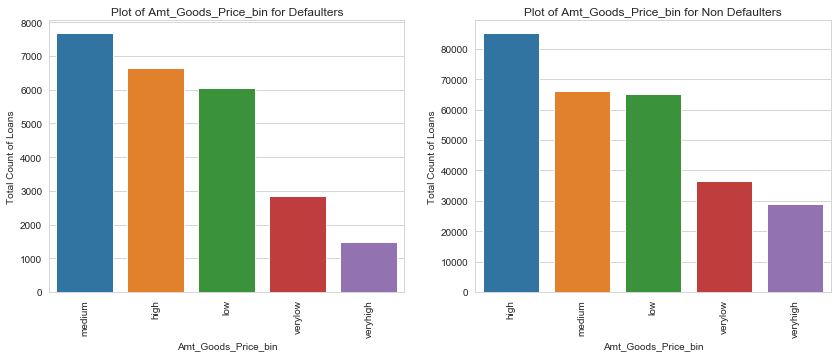

In [58]:
uni_variateplot('Amt_Goods_Price_bin',True)

####  Defaulters are mostly under Medium bin of Amount_Goods_Price

In [59]:
Defaulter['Rating2_bin']=pd.qcut(app_data.loc[:,'EXT_SOURCE_2'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Rating2_bin']=pd.qcut(app_data.loc[:,'EXT_SOURCE_2'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


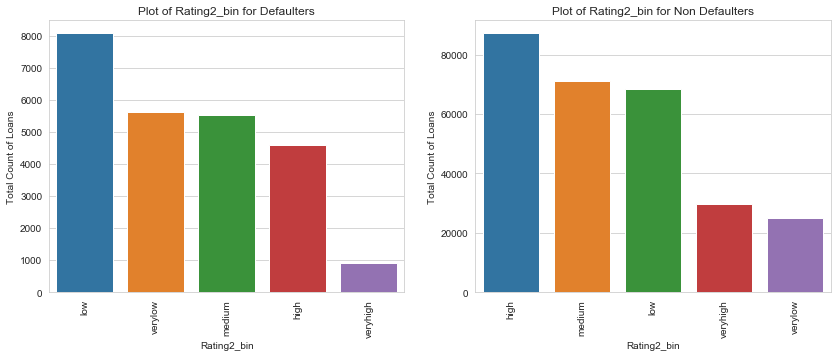

In [60]:
uni_variateplot('Rating2_bin',True)

#### 1. People with low rating are the more number of Defaulters
#### 2.People with high are rating are more number of Non-Defaulters

In [61]:
Defaulter['Rating3_bin']=pd.qcut(app_data.loc[:,'EXT_SOURCE_3'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Rating3_bin']=pd.qcut(app_data.loc[:,'EXT_SOURCE_3'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


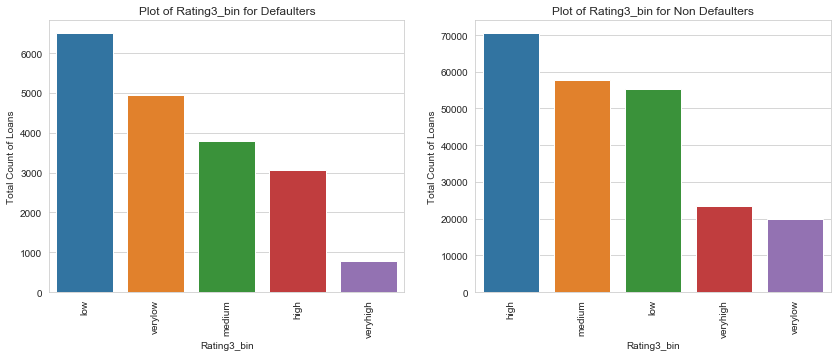

In [62]:
uni_variateplot('Rating3_bin',True)

#### 1. People with low rating are the more number of Defaulters
#### 2.People with high are rating are more number of Non-Defaulters

In [63]:
app_data['YEARS_BIRTH']=app_data['DAYS_BIRTH']/365

In [64]:
Defaulter['Age_bin']=pd.cut(app_data.loc[:,'YEARS_BIRTH'],bins=np.linspace(20, 70, num = 11))
Non_Defaulters['Age_bin']=pd.cut(app_data.loc[:,'YEARS_BIRTH'],bins=np.linspace(20, 70, num = 11))

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


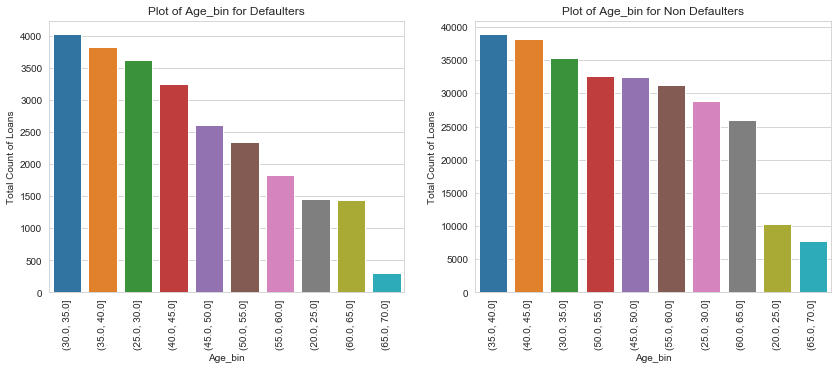

In [65]:
uni_variateplot('Age_bin',True)

#### People under the age group of 30-35 are under higher number of Defaulters

In [66]:
#Updating the Defaulters and Non-Defaulters
app_data['YEARS_EMPLOYED']=app_data['DAYS_EMPLOYED']/365
Defaulter=app_data[app_data.TARGET==1]
Non_Defaulters=app_data[app_data.TARGET==0]

In [67]:
Defaulter.groupby(['NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL':['mean','median','count','max']})

AMT_INCOME_TOTAL                              
                                 mean    median  count          max
NAME_INCOME_TYPE                                                   
Commercial associate    188382.946777  157500.0   5336    1890000.0
Maternity leave          58500.000000   58500.0      2      67500.0
Pensioner               135534.484066  121500.0   2981    1260000.0
State servant           164847.248392  148500.0   1244    3150000.0
Unemployed               72000.000000   65250.0      8     135000.0
Working                 163769.468760  135000.0  15157  117000000.0

In [68]:
Non_Defaulters.groupby(['NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL':['mean','median','min','max']})

AMT_INCOME_TOTAL                                
                                 mean    median       min         max
NAME_INCOME_TYPE                                                     
Businessman             652500.000000  495000.0  180000.0   2250000.0
Commercial associate    204302.162181  180000.0   26550.0  18000090.0
Maternity leave         195000.000000  135000.0   90000.0    360000.0
Pensioner               136451.784755  117000.0   26100.0   2250000.0
State servant           180739.842561  157500.0   27000.0   2250000.0
Student                 170500.000000  157500.0   81000.0    562500.0
Unemployed              132557.142857  101250.0   26550.0    337500.0
Working                 163216.944970  135000.0   25650.0   9000000.0

In [69]:
Defaulter.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED':['mean','median','count','max']})

YEARS_EMPLOYED                                 
                               mean       median  count          max
NAME_INCOME_TYPE                                                    
Commercial associate       4.554360     3.182192   5336    37.917808
Maternity leave            9.108219     9.108219      2     9.942466
Pensioner               1000.665753  1000.665753   2981  1000.665753
State servant              7.431458     5.586301   1244    39.136986
Unemployed              1000.665753  1000.665753      8  1000.665753
Working                    4.929309     3.328767  15157    39.835616

In [70]:
Defaulter.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL':['mean','median','count','max']})

AMT_INCOME_TOTAL                              
                                                               mean    median  count          max
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                                   
Academic degree               Commercial associate    270000.000000  270000.0      1     270000.0
                              Working                 348750.000000  348750.0      2     360000.0
Higher education              Commercial associate    224593.022177  193500.0   1240    1890000.0
                              Pensioner               165888.529412  157500.0    340     675000.0
                              State servant           195125.363372  168750.0    344    3150000.0
                              Working                 184744.481123  166275.0   2066    1305000.0
Incomplete higher             Commercial associate    202475.951087  180000.0    276    1350000.0
                              Pensioner               127193.478261  130500.0     23     261000.0
                              State servant           162630.000000  157500.0     50     450000.0
                              Unemployed               45000.000000   45000.0      1      45000.0
                              Working                 166646.166990  144000.0    515     675000.0
Lower secondary               Commercial associate    161312.727273  148500.0     55     450000.0
                              Pensioner               105939.705882   97875.0    102     315000.0
                              State servant            82687.500000   72000.0      8     157500.0
                              Working                 132841.434263  121500.0    251     360000.0
Secondary / secondary special Commercial associate    175794.498937  157500.0   3764    1575000.0
                              Maternity leave          58500.000000   58500.0      2      67500.0
                              Pensioner               132708.623609  114750.0   2516    1260000.0
                              State servant           153389.372922  135000.0    842     675000.0
                              Unemployed               75857.142857   67500.0      7     135000.0
                              Working                 160732.635235  135000.0  12323  117000000.0

In [71]:
Defaulter.groupby(['NAME_FAMILY_STATUS']).agg({'AMT_CREDIT':['mean','median','count','max']})

AMT_CREDIT                            
                               mean    median  count        max
NAME_FAMILY_STATUS                                             
Civil marriage        505422.854160  450000.0   2945  4027680.0
Married               597509.154371  521280.0  14815  2695500.0
Separated             529857.147770  454500.0   1614  3020760.0
Single / not married  479345.969097  425133.0   4417  2606400.0
Widow                 523387.575240  454500.0    937  2517300.0

In [72]:
#Function for Biariate analysis
def bivariate(var1,var2,subplot):
    if len(Defaulter[var1].value_counts())<5:
        plt.figure(figsize=[14,5])
        plt.subplot(1,2,1)
        sns.countplot(x=Defaulter[var1],data=Defaulter,hue=Defaulter[var2])
        plt.xlabel('{}'.format(var1))
        plt.ylabel('Total Count of Loans')
        plt.title('Plot of {} for Defaulters'.format(var1))
    else:
        if subplot==True:
            plt.figure(figsize=[14,5])
            plt.subplot(1,2,1)
        else:
            plt.figure(figsize=[15,10])
        sns.countplot(x=Defaulter[var1],data=Defaulter,hue=Defaulter[var2])
        plt.xlabel('{}'.format(var1))
        plt.ylabel('Total Count of Loans')
        plt.xticks(rotation=90)
        plt.title('Plot of {} for Defaulters'.format(var1))

    if len(Non_Defaulters[var1].value_counts())<5:        
        plt.subplot(1,2,2)
        sns.countplot(x=Non_Defaulters[var1],data=Non_Defaulters,hue=Non_Defaulters[var2])
        plt.xlabel('{}'.format(var1))
        plt.ylabel('Total Count of Loans')
        plt.title('Plot of {} for Non Defaulters'.format(var1))
    else:
        if subplot==True:
            plt.subplot(1,2,2)
        else:
            plt.figure(figsize=[15,10])
        sns.countplot(x=Non_Defaulters[var1],data=Non_Defaulters,hue=Non_Defaulters[var2])
        plt.xlabel('{}'.format(var1))
        plt.ylabel('Total Count of Loans')
        plt.xticks(rotation=90)
        plt.title('Plot of {} for Non Defaulters'.format(var1))

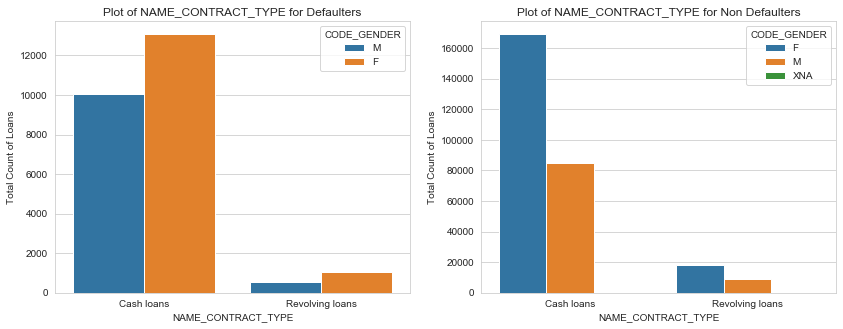

In [73]:
bivariate('NAME_CONTRACT_TYPE','CODE_GENDER',subplot=True)

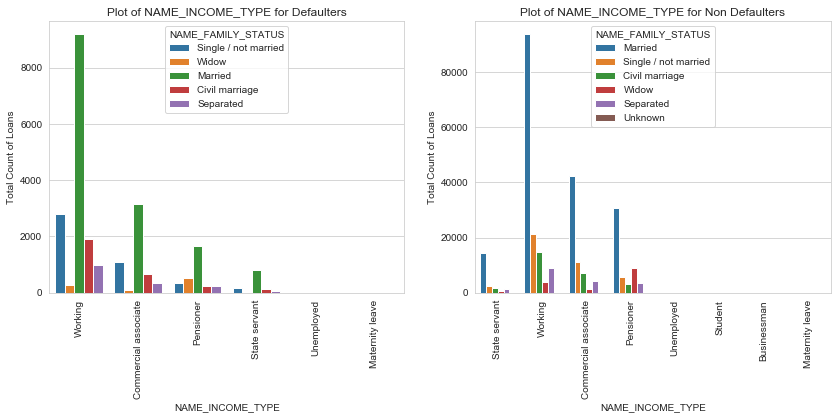

In [187]:
bivariate('NAME_INCOME_TYPE','NAME_FAMILY_STATUS',subplot=True)

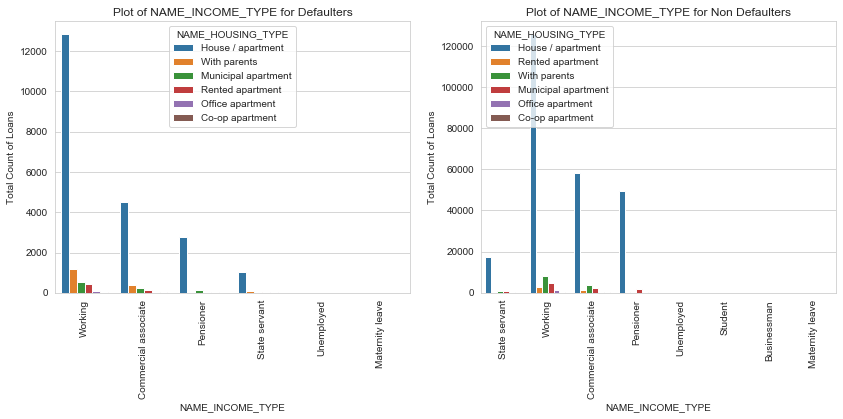

In [188]:
bivariate('NAME_INCOME_TYPE','NAME_HOUSING_TYPE',subplot=True)

#### Females are under the highest number of defaulters 

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


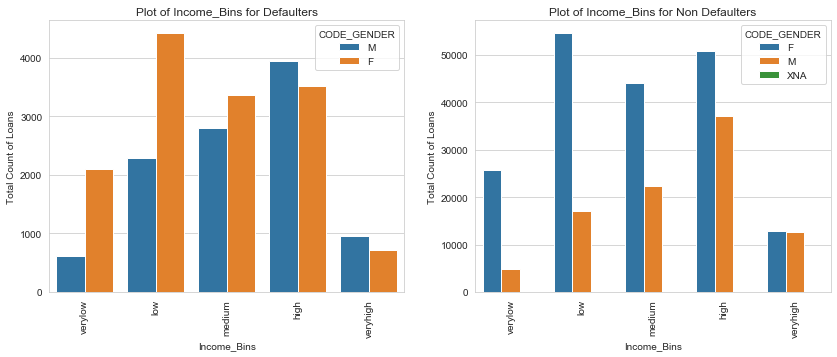

In [74]:
Defaulter['Income_Bins']=pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Income_Bins']=pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
bivariate('Income_Bins','CODE_GENDER',subplot=True)

#### Females with low income tend to be more number of defaulters

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


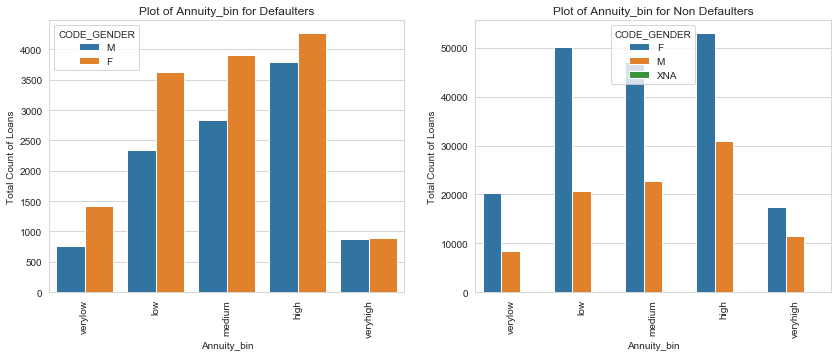

In [75]:
Defaulter['Annuity_bin']=pd.qcut(app_data.loc[:,'AMT_ANNUITY'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Annuity_bin']=pd.qcut(app_data.loc[:,'AMT_ANNUITY'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
bivariate('Annuity_bin','CODE_GENDER',subplot=True)

#### Females with high annuity amount tends to be more defaulters

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


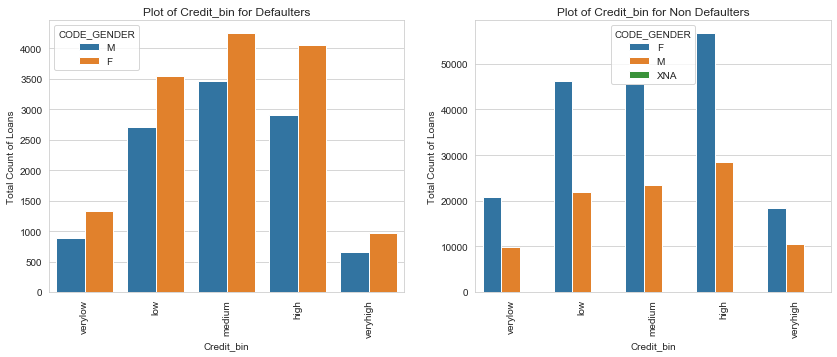

In [76]:
Defaulter['Credit_bin']=pd.qcut(app_data.loc[:,'AMT_CREDIT'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Credit_bin']=pd.qcut(app_data.loc[:,'AMT_CREDIT'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
bivariate('Credit_bin','CODE_GENDER',subplot=True)

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


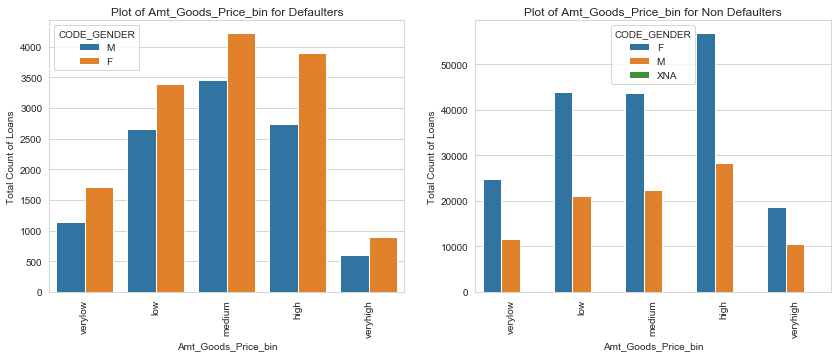

In [77]:
Defaulter['Amt_Goods_Price_bin']=pd.qcut(app_data.loc[:,'AMT_GOODS_PRICE'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
Non_Defaulters['Amt_Goods_Price_bin']=pd.qcut(app_data.loc[:,'AMT_GOODS_PRICE'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
bivariate('Amt_Goods_Price_bin','CODE_GENDER',subplot=True)

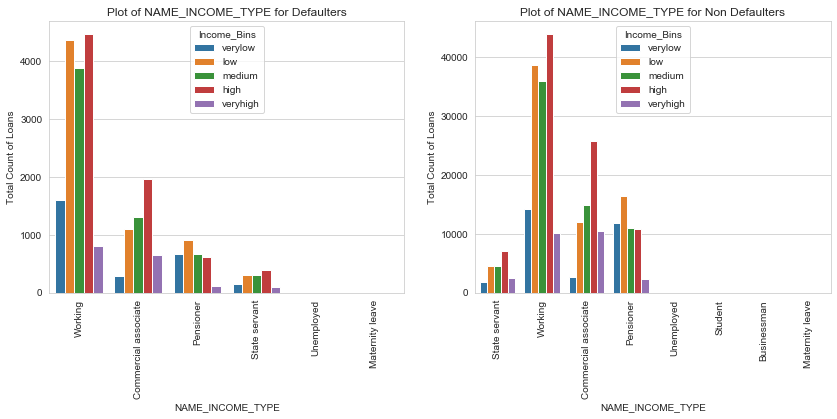

In [78]:
bivariate('NAME_INCOME_TYPE','Income_Bins',subplot=True)

#### Working class under high income level tends to be more defaulters

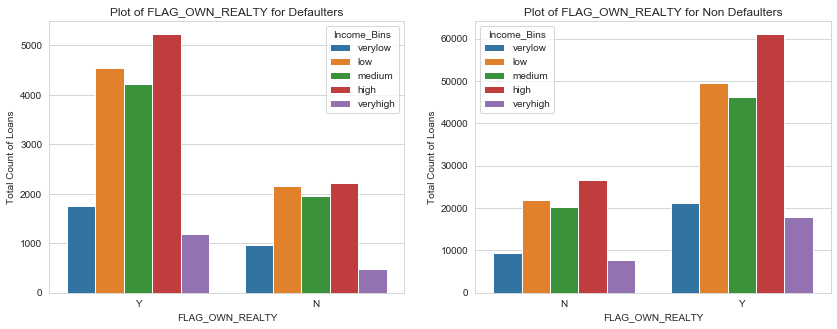

In [79]:
bivariate('FLAG_OWN_REALTY','Income_Bins',subplot=True)

#### People who own a flat  with high income tends to be more defaulters

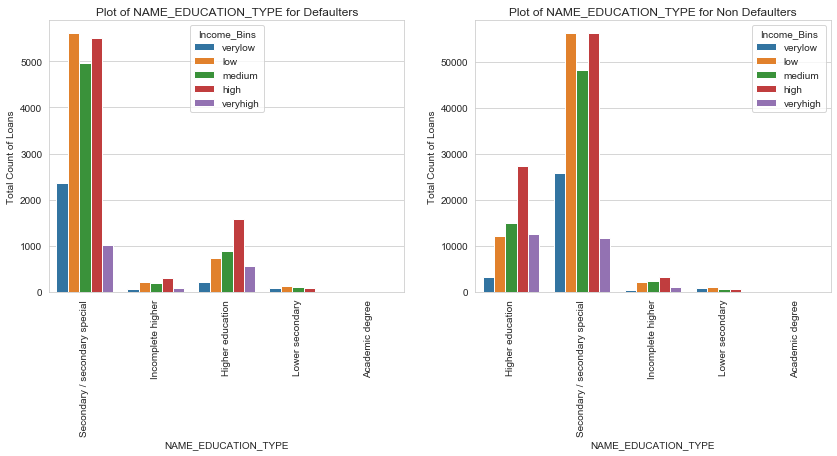

In [80]:
bivariate('NAME_EDUCATION_TYPE','Income_Bins',subplot=True)

#### People with Secondary education and low income tends to be more defaulters 

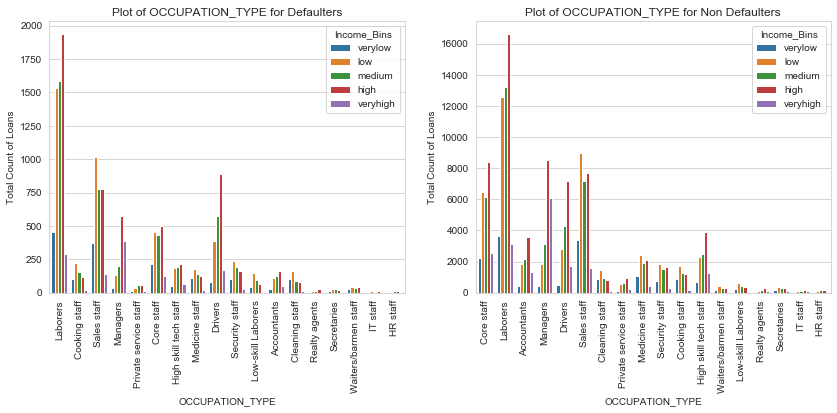

In [81]:
bivariate('OCCUPATION_TYPE','Income_Bins',subplot=True)

#### Labourers with high income tends to be more defaulters 

### Correlation for the columns 

In [82]:
#Selecting the columns forcorrelation
Columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','CNT_CHILDREN','HOUR_APPR_PROCESS_START',''
        'EXT_SOURCE_2','EXT_SOURCE_3']

In [83]:
#Finding the correlation for Defaulters
Defaulter_Filtered=Defaulter[Columns]
Defaulter_Correlation=Defaulter_Filtered.corr()
Defaulter_Correlation

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,CNT_CHILDREN,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3
AMT_INCOME_TOTAL,1.000000,0.038069,0.046390,0.037516,0.009094,-0.003258,-0.015032,-0.000007,0.004122,0.006629,0.004787,0.013819,0.007125,-0.015169
AMT_CREDIT,0.038069,1.000000,0.752045,0.983101,0.069044,0.134124,0.001425,0.027647,0.051542,0.051014,-0.001681,0.032109,0.120247,0.077058
AMT_ANNUITY,0.046390,0.752045,1.000000,0.752526,0.071475,0.013216,-0.081804,-0.033344,0.016311,0.075926,0.031652,0.031500,0.115767,0.040564
AMT_GOODS_PRICE,0.037516,0.983101,0.752526,1.000000,0.075961,0.134623,0.006166,0.027491,0.055378,0.047187,-0.008090,0.044677,0.130623,0.078107
REGION_POPULATION_RELATIVE,0.009094,0.069044,0.071475,0.075961,1.000000,0.047534,0.015303,0.057881,0.015245,-0.030071,-0.031916,0.142977,0.170077,-0.010739
DAYS_BIRTH,-0.003258,0.134124,0.013216,0.134623,0.047534,1.000000,0.582620,0.298398,0.250291,-0.206302,-0.261254,-0.061542,0.107159,0.170096
DAYS_EMPLOYED,-0.015032,0.001425,-0.081804,0.006166,0.015303,0.582620,1.000000,0.195712,0.228466,-0.187673,-0.193633,-0.059771,0.000581,0.095842
DAYS_REGISTRATION,-0.000007,0.027647,-0.033344,0.027491,0.057881,0.298398,0.195712,1.000000,0.100601,-0.145719,-0.149895,0.031576,0.072406,0.088481
DAYS_ID_PUBLISH,0.004122,0.051542,0.016311,0.055378,0.015245,0.250291,0.228466,0.100601,1.000000,0.030673,0.031676,-0.021272,0.058575,0.126716
CNT_FAM_MEMBERS,0.006629,0.051014,0.075926,0.047187,-0.030071,-0.206302,-0.187673,-0.145719,0.030673,1.000000,0.885595,-0.026875,0.001745,-0.020182


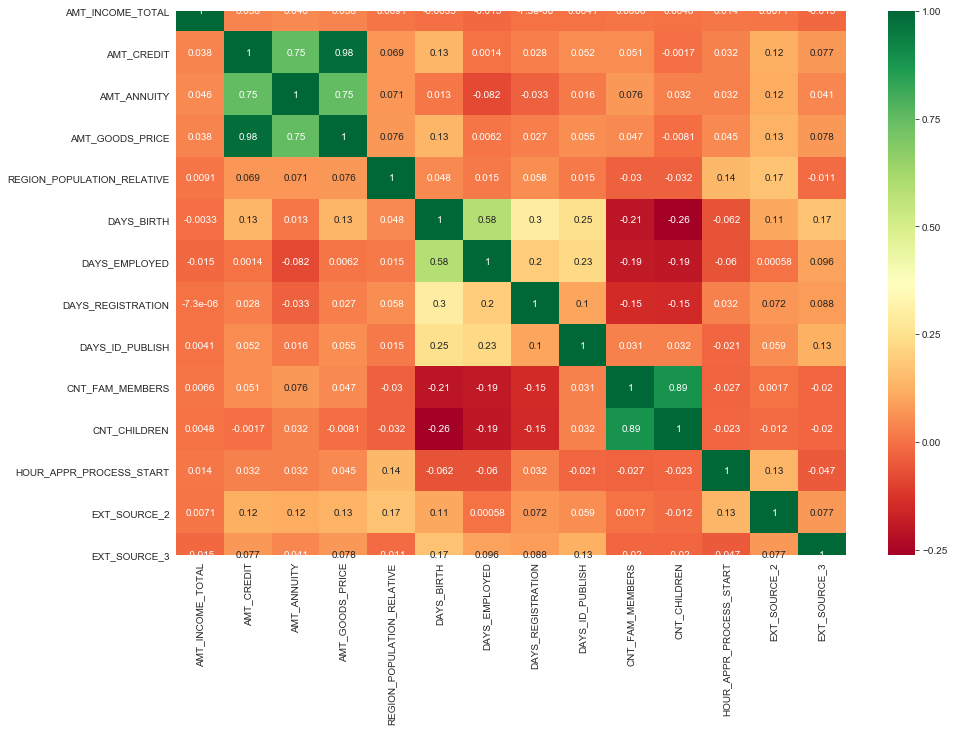

In [84]:
#Heatmap for Correlation of Defaulters
plt.figure(figsize=([15,10]))
sns.heatmap(Defaulter_Correlation,cmap='RdYlGn',annot=True)
plt.show()

In [85]:
#Finding top 10 correlations of Defaulters
Corr=Defaulter_Correlation.unstack()
Corr.sort_values(ascending=False).drop_duplicates().head(10)

EXT_SOURCE_3       EXT_SOURCE_3         1.000000
AMT_GOODS_PRICE    AMT_CREDIT           0.983101
CNT_FAM_MEMBERS    CNT_CHILDREN         0.885595
AMT_ANNUITY        AMT_GOODS_PRICE      0.752526
AMT_CREDIT         AMT_ANNUITY          0.752045
DAYS_BIRTH         DAYS_EMPLOYED        0.582620
                   DAYS_REGISTRATION    0.298398
                   DAYS_ID_PUBLISH      0.250291
DAYS_ID_PUBLISH    DAYS_EMPLOYED        0.228466
DAYS_REGISTRATION  DAYS_EMPLOYED        0.195712
dtype: float64

In [86]:
#Finding top 10 negative correlations
Corr.sort_values(ascending=True).drop_duplicates().head(10)

DAYS_BIRTH         CNT_CHILDREN              -0.261254
CNT_FAM_MEMBERS    DAYS_BIRTH                -0.206302
CNT_CHILDREN       DAYS_EMPLOYED             -0.193633
DAYS_EMPLOYED      CNT_FAM_MEMBERS           -0.187673
DAYS_REGISTRATION  CNT_CHILDREN              -0.149895
CNT_FAM_MEMBERS    DAYS_REGISTRATION         -0.145719
DAYS_EMPLOYED      AMT_ANNUITY               -0.081804
DAYS_BIRTH         HOUR_APPR_PROCESS_START   -0.061542
DAYS_EMPLOYED      HOUR_APPR_PROCESS_START   -0.059771
EXT_SOURCE_3       HOUR_APPR_PROCESS_START   -0.046657
dtype: float64

In [87]:
#Finding correlations for Non-Defaulters
Non_Defaulter_Filtered=Non_Defaulters[Columns]
Non_Defaulter_Correlation=Non_Defaulter_Filtered.corr()
Non_Defaulter_Correlation

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,CNT_CHILDREN,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3
AMT_INCOME_TOTAL,1.000000,0.342624,0.418825,0.349285,0.167796,-0.063915,-0.140826,-0.064287,-0.023717,0.034183,0.027429,0.076934,0.139459,-0.072735
AMT_CREDIT,0.342624,1.000000,0.771268,0.987246,0.100479,0.045810,-0.070760,-0.012278,0.000323,0.064131,0.002828,0.053919,0.128856,0.035610
AMT_ANNUITY,0.418825,0.771268,1.000000,0.776655,0.121079,-0.013734,-0.105537,-0.038731,-0.015165,0.075530,0.020775,0.053786,0.126293,0.027585
AMT_GOODS_PRICE,0.349285,0.987246,0.776655,1.000000,0.103706,0.043038,-0.069247,-0.014746,0.002560,0.062434,-0.000759,0.063068,0.135429,0.038469
REGION_POPULATION_RELATIVE,0.167796,0.100479,0.121079,0.103706,1.000000,0.024391,-0.007544,0.053626,0.000604,-0.023508,-0.024291,0.173155,0.198604,-0.012542
DAYS_BIRTH,-0.063915,0.045810,-0.013734,0.043038,0.024391,1.000000,0.626403,0.340103,0.268466,-0.288478,-0.338943,-0.095469,0.076944,0.196175
DAYS_EMPLOYED,-0.140826,-0.070760,-0.105537,-0.069247,-0.007544,0.626403,1.000000,0.216880,0.276043,-0.239019,-0.245585,-0.095309,-0.029027,0.111628
DAYS_REGISTRATION,-0.064287,-0.012278,-0.038731,-0.014746,0.053626,0.340103,0.216880,1.000000,0.103629,-0.176023,-0.186566,0.007473,0.054024,0.105085
DAYS_ID_PUBLISH,-0.023717,0.000323,-0.015165,0.002560,0.000604,0.268466,0.276043,0.103629,1.000000,0.019614,0.028318,-0.033572,0.040508,0.123657
CNT_FAM_MEMBERS,0.034183,0.064131,0.075530,0.062434,-0.023508,-0.288478,-0.239019,-0.176023,0.019614,1.000000,0.878669,-0.010337,-0.001097,-0.027463


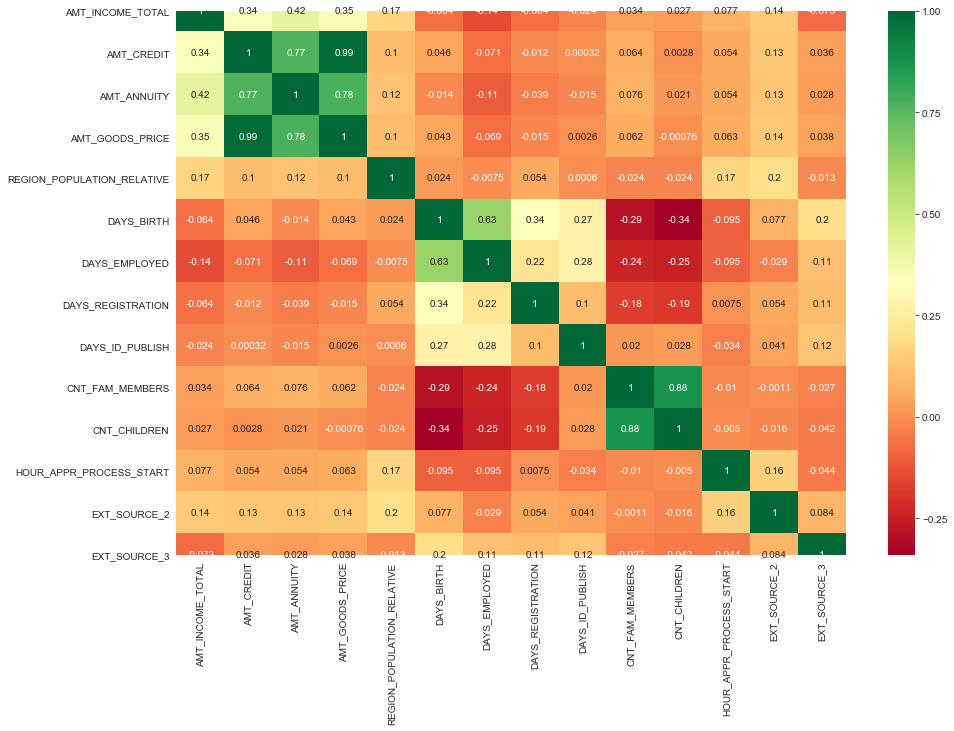

In [88]:
#Heatmap for COrrelation for Non-Defaulters
plt.figure(figsize=([15,10]))
sns.heatmap(Non_Defaulter_Correlation,cmap='RdYlGn',annot=True)
plt.show()

In [89]:
#Top 10 Positive correlations for Non-Defaulters
Non_Corr=Non_Defaulter_Correlation.unstack()
Non_Corr.sort_values(ascending=False).drop_duplicates().head(10)

EXT_SOURCE_3      EXT_SOURCE_3         1.000000
AMT_CREDIT        AMT_GOODS_PRICE      0.987246
CNT_CHILDREN      CNT_FAM_MEMBERS      0.878669
AMT_GOODS_PRICE   AMT_ANNUITY          0.776655
AMT_ANNUITY       AMT_CREDIT           0.771268
DAYS_EMPLOYED     DAYS_BIRTH           0.626403
AMT_ANNUITY       AMT_INCOME_TOTAL     0.418825
AMT_GOODS_PRICE   AMT_INCOME_TOTAL     0.349285
AMT_INCOME_TOTAL  AMT_CREDIT           0.342624
DAYS_BIRTH        DAYS_REGISTRATION    0.340103
dtype: float64

In [90]:
#Top 10 Negative correlations 
Non_Corr.sort_values(ascending=True).drop_duplicates().head(10)

CNT_CHILDREN       DAYS_BIRTH                -0.338943
CNT_FAM_MEMBERS    DAYS_BIRTH                -0.288478
DAYS_EMPLOYED      CNT_CHILDREN              -0.245585
                   CNT_FAM_MEMBERS           -0.239019
DAYS_REGISTRATION  CNT_CHILDREN              -0.186566
CNT_FAM_MEMBERS    DAYS_REGISTRATION         -0.176023
AMT_INCOME_TOTAL   DAYS_EMPLOYED             -0.140826
DAYS_EMPLOYED      AMT_ANNUITY               -0.105537
DAYS_BIRTH         HOUR_APPR_PROCESS_START   -0.095469
DAYS_EMPLOYED      HOUR_APPR_PROCESS_START   -0.095309
dtype: float64

## Top5 Positive Correlations

1. AMT_GOODS_PRICE - AMT_CREDIT
2. CNT_CHILDREN - CNT_FAM_MEMBERS
3. AMT_ANNUITY - AMT_GOODS_PRICE
4. AMT_CREDIT - AMT_ANNUITY
5. DAYS_BIRTH - DAYS_EMPLOYED



### Top 5 Negative Correlations
1. DAYS_BIRTH - CNT_CHILDREN
2. CNT_FAM_MEMBERS - DAYS_BIRTH
3. CNT_CHILDREN - DAYS_EMPLOYED
4. DAYS_EMPLOYED - CNT_FAM_MEMBERS
5. DAYS_REGISTRATION - CNT_CHILDREN

### Reading Application Data 

In [92]:
#Importing the previous application
prev_data=pd.read_csv(r'C:\Users\gauta\OneDrive\Documents\UpGrad\Case Study - Credit EDA\previous_application.csv')

In [93]:
#Shape of the previous application data
prev_data.shape

(1670214, 37)

In [94]:
#Finding the null value percentage of all the columns
(prev_data.isnull().sum()/len(prev_data.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [95]:
null_cols=prev_data.isnull().sum()
null_cols=null_cols[null_cols.values>=0.49*len(prev_data.index)]

In [96]:
#Removing columns more than 49% null values
null_data=list(null_cols.index)
prev_data.drop(labels=null_data,axis=1,inplace=True)

In [98]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

In [99]:
#Removing unwanted columns
Unwanted_columns=['SELLERPLACE_AREA','NAME_YIELD_GROUP','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']

In [100]:
#Removing unwanted columns
prev_data.drop(labels=Unwanted_columns,axis=1,inplace=True)

In [101]:
#Merging the Previous data and Application data
new_prev_app_merged=pd.merge(app_data,prev_data,how='inner',on='SK_ID_CURR')

### Univariate Analysis

In [121]:
#Function for Univariate analysis
def prev_univariate(var):
    plt.figure(figsize=([10,5]))
    plt.xlabel(var)
    plt.ylabel('Count of {}'.format(var))
    plt.title('Distribution of {}'.format(var))
    if len(new_prev_app_merged[var].value_counts())>5:
        plt.xticks(rotation=90)
    sns.countplot(new_prev_app_merged[var])
    plt.show()

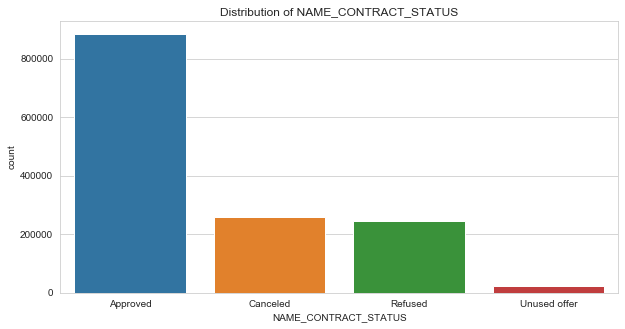

In [118]:
prev_univariate('NAME_CONTRACT_STATUS')

In [131]:
Approved=new_prev_app_merged[new_prev_app_merged['NAME_CONTRACT_STATUS']=='Approved']
Cancelled=new_prev_app_merged[new_prev_app_merged['NAME_CONTRACT_STATUS']=='Canceled']
Refused=new_prev_app_merged[new_prev_app_merged['NAME_CONTRACT_STATUS']=='Refused']
Unused=new_prev_app_merged[new_prev_app_merged['NAME_CONTRACT_STATUS']=='Unused offer']

In [132]:
print('Percentage of approved customers are {}'.format(round((len(Approved)/len(new_prev_app_merged)*100),2)))
print('Percentage of Cancelled customers are {}'.format(round((len(Cancelled)/len(new_prev_app_merged)*100),2)))
print('Percentage of Refused customers are {}'.format(round((len(Refused)/len(new_prev_app_merged)*100),2)))
print('Percentage of unused customers are {}'.format(round((len(Unused)/len(new_prev_app_merged)*100),2)))

Percentage of approved customers are 62.68
Percentage of Cancelled customers are 18.35
Percentage of Refused customers are 17.36
Percentage of unused customers are 1.61


In [159]:
def status_chart(var):
    plt.figure(figsize=([14,5]))
    plt.subplot(1,4,1)
    plt.xticks(rotation=90)
    sns.countplot(Approved[var], order=Approved[var].value_counts().index)
    plt.ylabel('Count of loans')
    plt.title('Approved')
    
    plt.subplot(1,4,2)
    plt.xticks(rotation=90)
    sns.countplot(Cancelled[var], order=Cancelled[var].value_counts().index)
    plt.ylabel('Count of loans')
    plt.title('Cancelled')
    
    plt.subplot(1,4,3)
    plt.xticks(rotation=90)
    sns.countplot(Refused[var], order=Refused[var].value_counts().index)
    plt.ylabel('Count of loans')
    plt.title('Refused')
    
    plt.subplot(1,4,4)
    plt.xticks(rotation=90)
    sns.countplot(Unused[var], order=Unused[var].value_counts().index)
    plt.ylabel('Count of loans')
    plt.title('Unused')


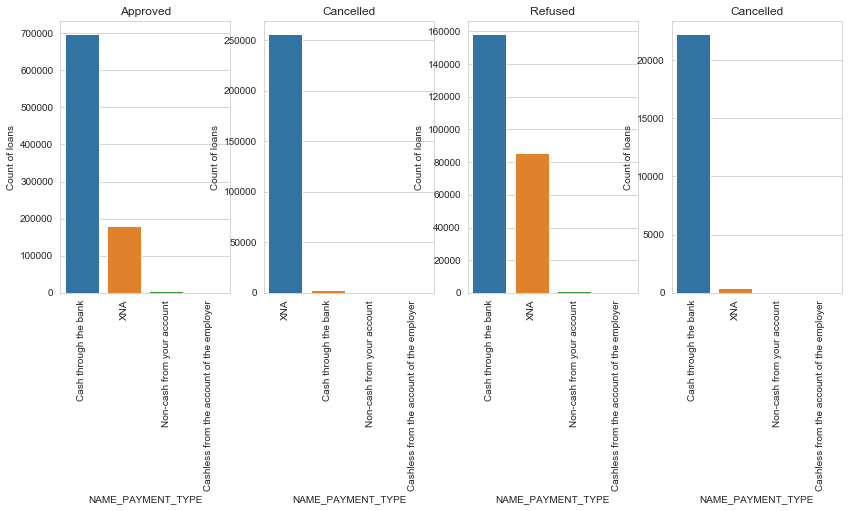

In [160]:
status_chart('NAME_PAYMENT_TYPE')

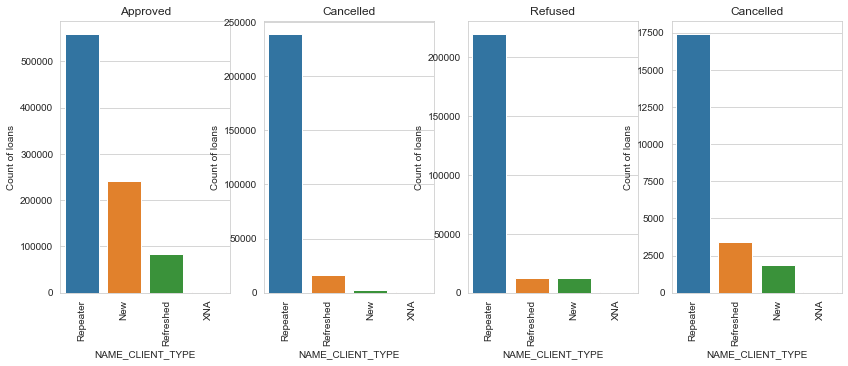

In [161]:
status_chart('NAME_CLIENT_TYPE')

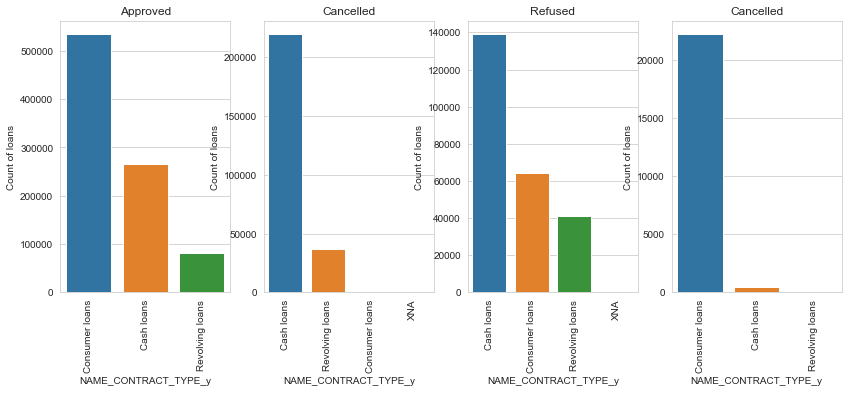

In [162]:
status_chart('NAME_CONTRACT_TYPE_y')

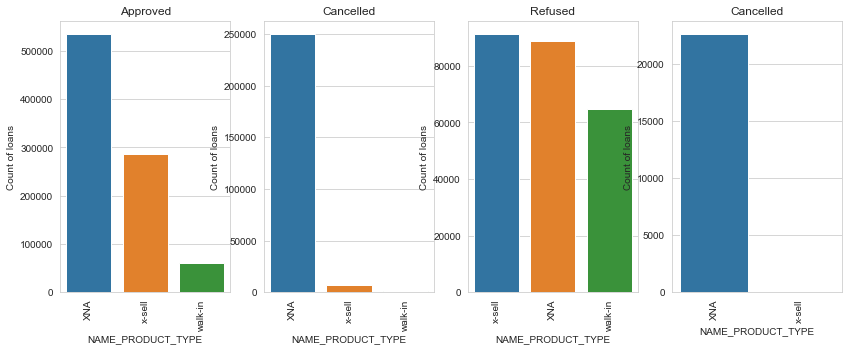

In [163]:
status_chart('NAME_PRODUCT_TYPE')

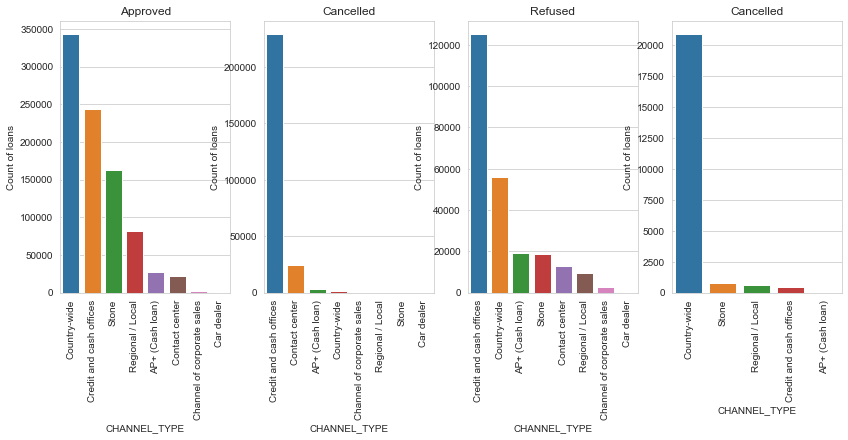

In [164]:
status_chart('CHANNEL_TYPE')

### Bivariate Analysis 

In [175]:
#Function for bivariate analysis
def bi_status_chart(var,var2):
    plt.figure(figsize=([20,8]))
    plt.xticks(rotation=90)
    sns.countplot(new_prev_app_merged[var],hue=new_prev_app_merged[var2], order=new_prev_app_merged[var].value_counts().index)
    plt.ylabel('Count of loans')
    plt.title('Distribution of {} vs {}'.format(var,var2))

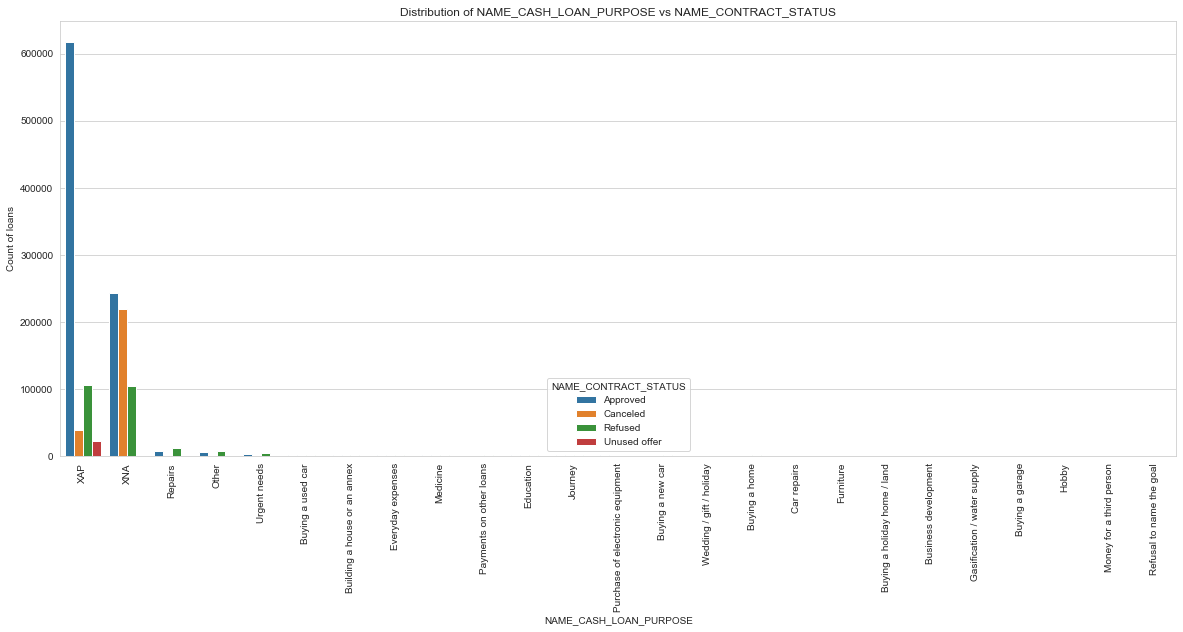

In [176]:
bi_status_chart('NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS')

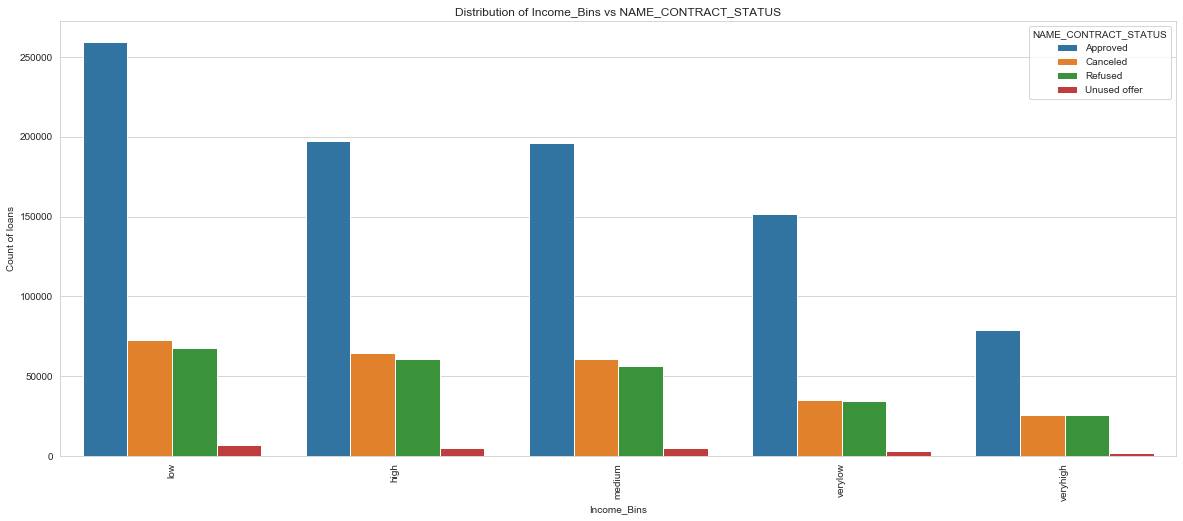

In [181]:
new_prev_app_merged['Income_Bins']=pd.qcut(new_prev_app_merged.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.6,0.9,1],labels=['verylow','low','medium','high','veryhigh'])
bi_status_chart('Income_Bins','NAME_CONTRACT_STATUS')

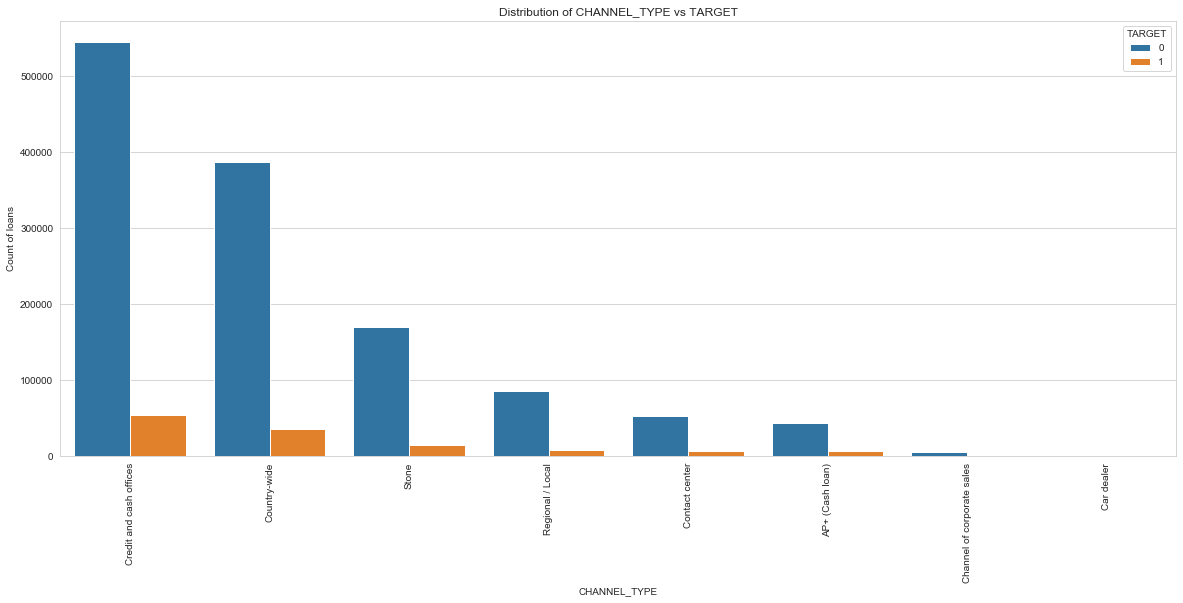

In [189]:
bi_status_chart('CHANNEL_TYPE','TARGET')

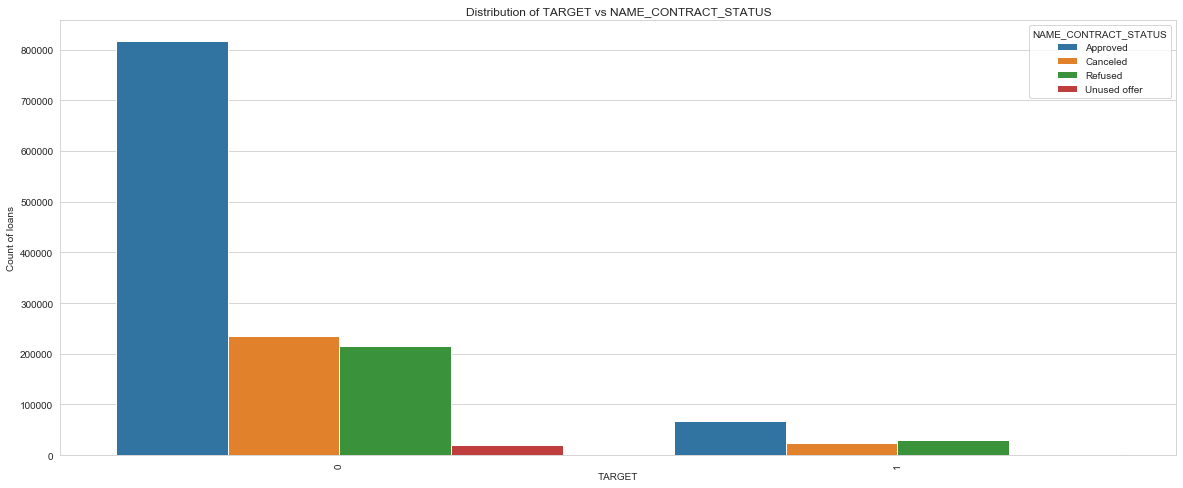

In [182]:
bi_status_chart('TARGET','NAME_CONTRACT_STATUS')

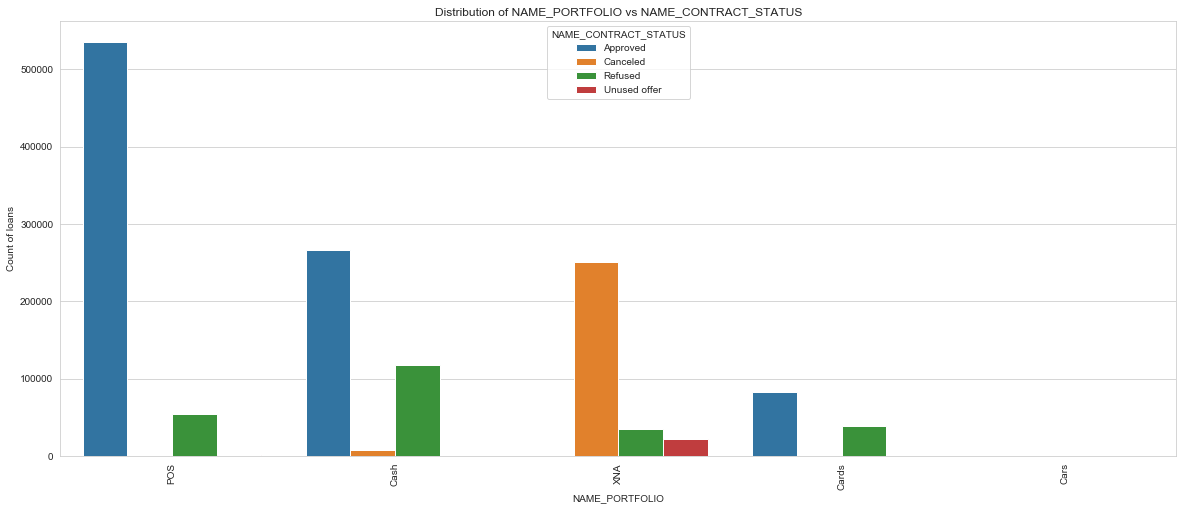

In [183]:
bi_status_chart('NAME_PORTFOLIO','NAME_CONTRACT_STATUS')

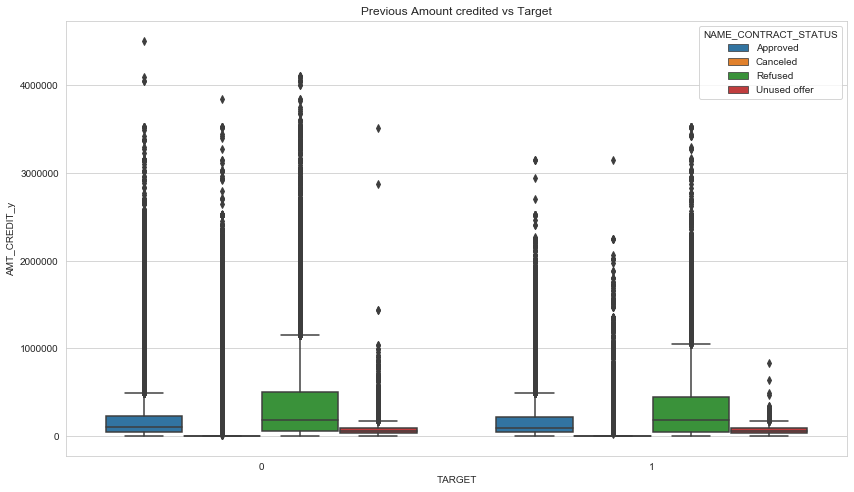

In [185]:
plt.figure(figsize=([14,8]))
plt.title('Previous Amount credited vs Target')
sns.boxplot(x=new_prev_app_merged['TARGET'],y=new_prev_app_merged['AMT_CREDIT_y'],hue=new_prev_app_merged['NAME_CONTRACT_STATUS'])